# PROGRAMMING FOR DATA ANALYSIS
##  Project 2018
### DATE DUE ON/BEFORE 14 DEC 2018
### PAUL KEARNEY
### G00364787

Problem statement

It is proposed to investigate any relationship between the touchdown/"slideout" distance of the aircraft known as the X-15 and the following parameters:  
Vertical velocity - The velocity at which the aircrat decends due to gravity,  
Indicated airspeed - the speed at which the aircraft travels through the air,    
True_GroundSpeed - the speed at which the aircraft travels over the ground,  
Slideout distance - the distance that the aircraft uses to eventually come to halt on the ground.  

It is envisaged that as a result of energy in the aircraft, that the landing(skidding) distance will vary.  
Energy in the aircraft will be proportional to the Vertical velocity, Airspeed and Groundspeed and in turn the energy in the aircraft needs to be 'depleted sufficiently' to allow the aircraft to land.  
The measurement of this is the distance used during the slideout (usually known as rollout on wheels)

Data is supplied in the document 'STATISTICAL ANALYSIS OF LANDING CONTACT CONDITIONS OF THE X-15 AIRPLANE' at the URL https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19670005606.pdf   


## Separation from work-related data  
The Datasets that I work with are interesting and would be interesting to use in this project but because they are related to my work and confidential, it means that they cannot be used not even if they were adjusted or scaled in either X or Y axes or both.    
In addition - placing this project on GITHUB would also mean that putting work related data on here is impossible.  
It was a long time before I found this PDF file on the NASA Technical website which provided sufficient data to create suitable datasets.  
Whilst the subject of landing distance is related to my work, there is 100% separation from any data that I process at work.  My employer does not have and never had any X-15 aircraft.


## Reason for very late start.  
Delayed start to project:  
Mostly work related. 
My head was not in any shape to do any study after work.  
Also not knowing what to pick as a actual subject that would not be work related and free from any possibility of a confidentiality breach.  


## Dataset origins and descriptions

The following parameters are known to be related to the Slideout(rollout) distance.
Vertical velocity at landing
Indicated Airspeed at Landing
True Groundspeed at Landing

It has been found from landing data that the parameters (Table II  page 18) are   
Page 4 : Vertical Velocity = Average 3.4 ft/sec, Poisson, Min 1, Max 8 ft/sec  ( 200 ft/min )  
Page 5 : Indicated Airspeed = 190 knots Normal bell-curve, Min 150, Max 230, SD = 14.5 knots.  
Page 6 : True Groundspeed = Centered on 193 knots Normal bell-curve, Min 160, Max 240, SD = 18.4 knots.  
and  
Page 10: Slideout (Rollout) distance =  Centered on 5979 Normal bell-curve, Min 3000, max 9000, SD = 1139 feet  



## Notebook/Program Description
The notebook starts off by creating working storage for the data and filenames.  
Following this, the datasets are simulated based on information from the NASA technical report.

The datasets are then 'cleaned' so that the data values go to 3 decimal places only.  

This then gives the first dataset.  
This dataset is saved as a CSV to a preset filename.

The dataset which is still in memory is then translated/shifted towards the centre of the graphs.
This shifted dataset is then saved as a CSV to disk into another preset filename.

The dataset which is still in memory is then divided by the standard deviation which then becomes Normalized.  
This dataset is then saved to disk as a CSV into another preset filename.

The notebook/program then takes the previously saved files back into memory in-turn and plotted.  
The plotted output is then saved to preset filenames using the PNG format.  


In [231]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

# ref #1
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# import functionality for computing some statistics
import statistics 

# Setup the data arrays/lists
# VerticalSpeed is usually known as VerticalSpeed nowadays - the name VSI for the indicator
VerticalVelocity = []
# Inidcated Airspeed = speed through the air
IndicAirspeed    = []
# True groundspeed = speed over the ground
Truegroundspeed  = []
# Distance from the 1m marker
Distance1m = []
# Slideout Distance = the distance used on the ground after landing to eventually come to a stop
SlideoutDistance = []
# Slideout Distance = the distance used on the ground in multiples of 1000 feet
SlideoutDist1000 = []
# The datset of an amalgaated dataset of the previous datasets
Overall = []
# a temp dataset
tmpset = []

# filenames for storing the data created by this jupyter notebook
# instead of just typing in the filename as a set string - using variables to allow re-use and flexibility
prog_id = "proj2018"
student_id = "g00364787"
fil_end = ".csv"
filnam_realdata  = student_id + "-" + prog_id + "-" + "dataactual" + fil_end
filnam_normdata  = student_id + "-" + prog_id + "-" + "datanormalised" + fil_end
filnam_shiftdata = student_id + "-" + prog_id + "-" + "datashifted" + fil_end

fil_end = ".png"
graphic_realdata  = student_id + "-" + prog_id + "-" + "dataactual" + fil_end
graphic_normdata  = student_id + "-" + prog_id + "-" + "datanormalised" + fil_end
graphic_shiftdata = student_id + "-" + prog_id + "-" + "datashifted" + fil_end



# text idenitification of the columns in the created cdv files
cols_titles = "VerticalVelocity,IndicatedAirspeed,TrueGroundspeed,Distance1m,SlideoutDistance,SlideoutDist1000"

n = 200             # size of the dataset  ( n = sample_size )
x = 0               # temp variable
dec_digits = 1000   # used to redcue the number of decimal places

tmpset = []         #  ref #11 clearing a list     tmpset.clear()  used to work but sometimes doesn't

###################################################################################################

# Start to create data - removed the long-winded way to create the datasets

# Populate the VerticalVelocity data list
# ref #3
averg = 3.4
VerticalVelocity = np.random.poisson(averg, n)

# setup the Indicated airspeed dataset
# ref #4
center = 190
sd = 14.5
IndicAirspeed = np.random.normal(center, sd, n)

# setup the TrueGroundSpeed dataset
center = 193
sd = 18.4
TrueGroundspeed = np.random.normal(center, sd, n)

#setup the Distance at 1 mile
center = 5447
sd = 1366.8
Distance1m = np.random.normal(center, sd, n)

# setup the SlideoutDistance dataset
center = 5979
sd = 1139.2
SlideoutDistance = np.random.normal(center, sd, n)

##############################################################################################


# round the SlideoutDistance down to the nearest 1000 to be used for categories (like the 'species' column in the IRIS dataset
SlideoutDist1000 = []
for x in range(n):
    SlideoutDist1000.append(  (int(SlideoutDistance[x] / 1000)))
        
# round off each list to a set number of decimal places        
for x in range(n):
    VerticalVelocity[x] = int( dec_digits * VerticalVelocity[x] ) / dec_digits
    IndicAirspeed[x]    = int( dec_digits * IndicAirspeed[x]    ) / dec_digits
    TrueGroundspeed[x]  = int( dec_digits * TrueGroundspeed[x]  ) / dec_digits
    Distance1m[x]       = int( dec_digits * Distance1m[x]       ) / dec_digits
    SlideoutDistance[x] = int( dec_digits * SlideoutDistance[x] ) / dec_digits


    
# Now gather the Averages and StdDev of the real data
VVavg = VerticalVelocity.mean()
VVstd = VerticalVelocity.std()

IASavg = IndicAirspeed.mean()
IASstd = IndicAirspeed.std()

TGSavg = TrueGroundspeed.mean()
TGSstd = TrueGroundspeed.std()

Dist1mavg = Distance1m.mean()
Dist1mstd = Distance1m.std()

SODavg = SlideoutDistance.mean()
SODstd = SlideoutDistance.std()

    
# save overall Dataset to file
# ref #5 + #6
# open an output file for saving the datset line by line - thereby making a 'normal' CSV file'
file = open(filnam_realdata,'w') 
file.write(cols_titles+"\n")
# now to generate a single dataset with each element of the three input giving a simulated output the slideout distance
Overall.clear()
for x in range(n):
    tmp5 = str(VerticalVelocity[x])+","+str(IndicAirspeed[x])   +","+str(TrueGroundspeed[x]) +","+str(Distance1m[x])      +","+str(SlideoutDistance[x])+","+str(SlideoutDist1000[x])
    Overall.append( tmp5 )
    file.write(tmp5+"\n")
# close the file.
file.close()


######################################################################################################
# shift the data for each parameter towards the mean and redc ue the number of decimal places
for x in range(n):
    VerticalVelocity[x] = (VerticalVelocity[x] - VVavg)

# shift the list towards the mean
for x in range(n):
    IndicAirspeed[x]    = (IndicAirspeed[x] - IASavg)

# shift the list towards the mean
for x in range(n):
    TrueGroundspeed[x]  = (TrueGroundspeed[x] - TGSavg)

# shift the list towards the mean
for x in range(n):
    Distance1m[x]       = (Distance1m[x] - Dist1mavg)
    
# shift the list towards the mean
for x in range(n):
    SlideoutDistance[x] = (SlideoutDistance[x] - SODavg)


# Do not scale the list  SlideoutDist1000 as this is the 'key' or the 'species' (iris dataset)

# save overall Dataset to file
# ref #5 + #6
# open an output file for saving the datset line by line - thereby making a 'normal' CSV file'
file = open(filnam_shiftdata,'w') 
file.write(cols_titles+"\n")
# now to generate a new single dataset with each element of the three input giving a simulated output the slideout distance
Overall.clear()
for x in range(n):
    tmp5 = str(VerticalVelocity[x])+","+str(IndicAirspeed[x])   +","+str(TrueGroundspeed[x]) +","+str(Distance1m[x])      +","+str(SlideoutDistance[x])+","+str(SlideoutDist1000[x])
    Overall.append( tmp5 )
    file.write(tmp5+"\n")
# close the output file
file.close()

##############################################################################################################

### Complete the Normalize of the data which has already been shifted towards the 'average'
for x in range(n):
    VerticalVelocity[x] = ((VerticalVelocity[x] - VVavg) / VVstd  )

# Complete the normalize of the dataset
for x in range(n):
    IndicAirspeed[x]    = ((IndicAirspeed[x] - IASavg)     / IASstd)

# Complete the normalize of the dataset
for x in range(n):
    TrueGroundspeed[x]  = ((TrueGroundspeed[x] - TGSavg)  / TGSstd )

# Complete the normalize of the dataset
for x in range(n):
    Distance1m[x]       = ((Distance1m[x] - Dist1mavg)/ Dist1mstd )

# Complete the normalize of the dataset
for x in range(n):
    SlideoutDistance[x] = ((SlideoutDistance[x] - SODavg)/ SODstd )

    
# Do not scale the list  SlideoutDist1000 as this is the 'key' or the 'species' (iris dataset)


# save overall Dataset to file
# ref #5 + #6
# open an output file for saving the datset line by line - thereby making a 'normal' CSV file'
file = open(filnam_normdata,'w') 
file.write(cols_titles+"\n")
# now to generate a new single dataset with each element of the three input giving a simulated output the slideout distance
Overall.clear()
for x in range(n):
    tmp5 = str(VerticalVelocity[x])+","+str(IndicAirspeed[x])   +","+str(TrueGroundspeed[x]) +","+str(Distance1m[x])      +","+str(SlideoutDistance[x])+","+str(SlideoutDist1000[x])
    Overall.append( tmp5 )
    file.write(tmp5+"\n")
# close the output file
file.close()
###############################################################################################################




Graph of Simulated data for X-15 
Skid_Distance -v- Vertical velocity, Airspeed, True_Groundspeed and Distance at 1 mile


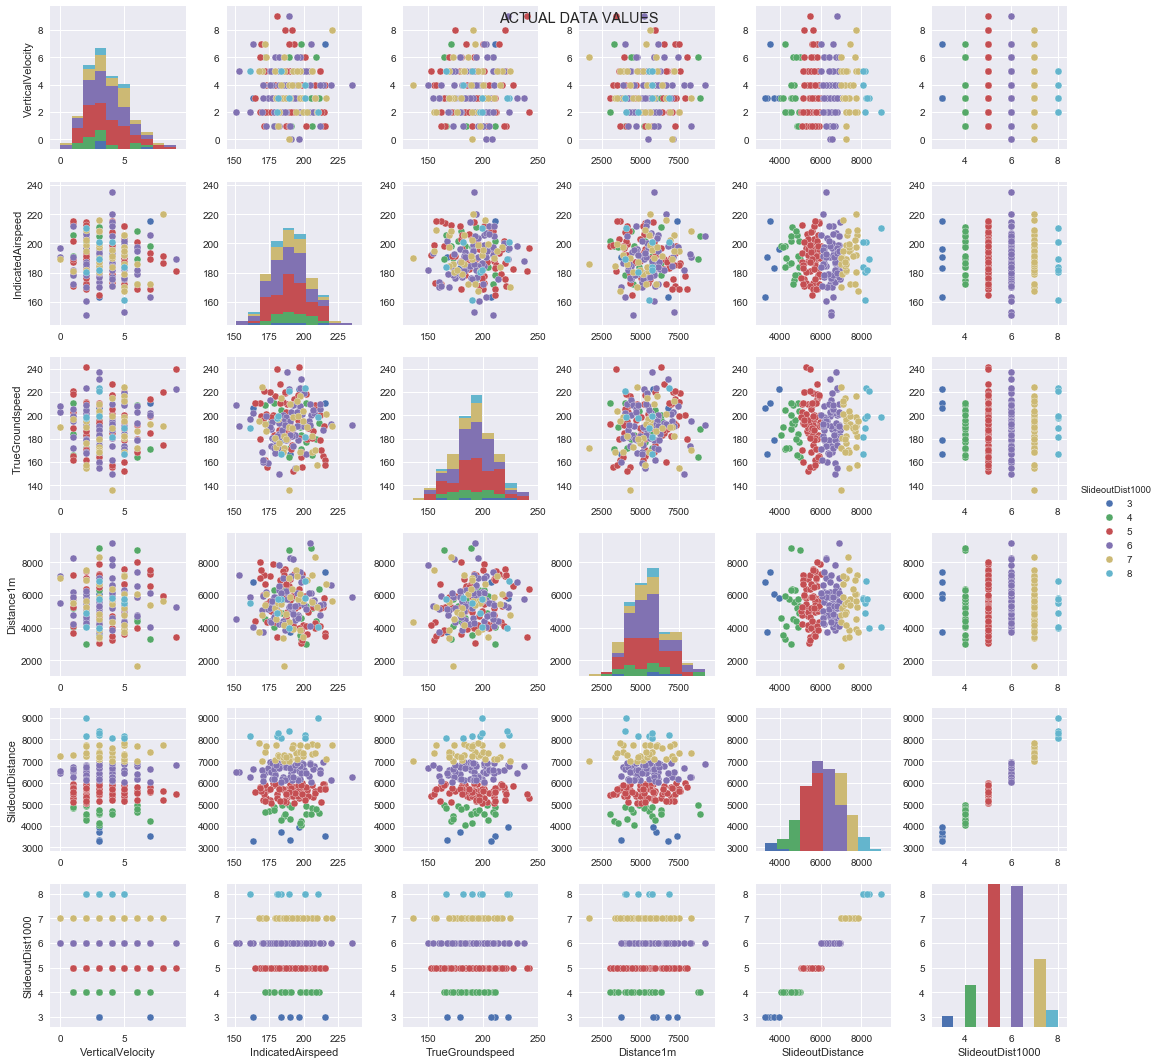

In [232]:

# ref #1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n")
print("Graph of Simulated data for X-15 \nSkid_Distance -v- Vertical velocity, Airspeed, True_Groundspeed and Distance at 1 mile")


df = pd.read_csv(filnam_realdata)
# use  SlideoutDist1000 to 'layer' the data into  layers of multiples of 1000 feet distances
sns.pairplot(df, hue='SlideoutDist1000')
plt.suptitle("ACTUAL DATA VALUES")       # ref #9
plt.savefig(graphic_realdata)            #  ref #10  Saving graphics to disk
plt.show()




Graph of Simulated data for X-15 
Skid_Distance -v- Vertical velocity, Airspeed, True_Groundspeed and Distance at 1 mile


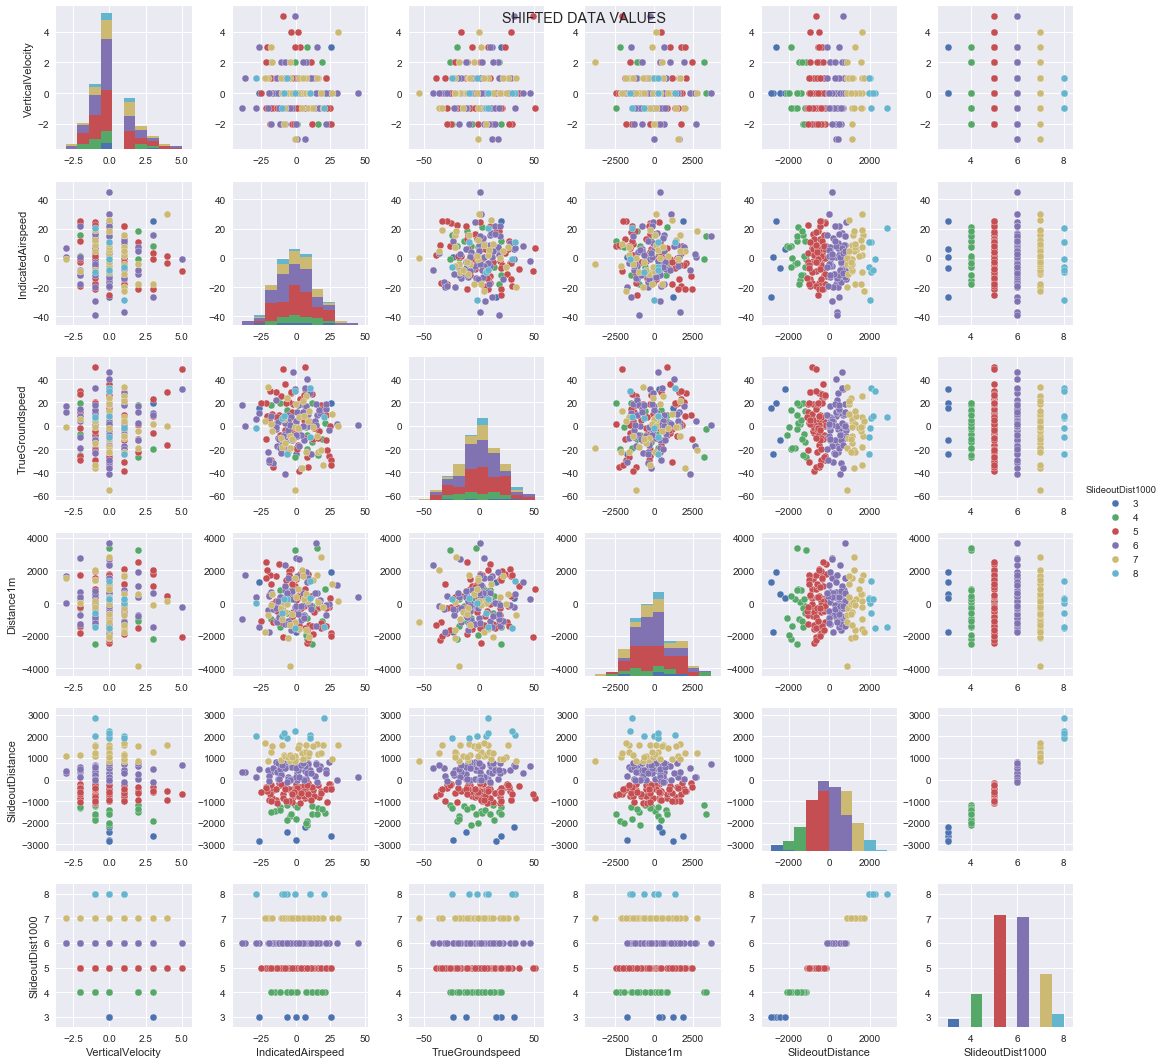

In [233]:
# ref #1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n")
print("Graph of Simulated data for X-15 \nSkid_Distance -v- Vertical velocity, Airspeed, True_Groundspeed and Distance at 1 mile")

df = pd.read_csv(filnam_shiftdata)
# use  SlideoutDist1000 to 'layer' the data into  layers of multiples of 1000 feet distances
sns.pairplot(df, hue='SlideoutDist1000')
plt.suptitle("SHIFTED DATA VALUES")       # ref #9
plt.savefig(graphic_shiftdata)            #  ref #10  Saving graphics to disk
plt.show()




Graph of Simulated data for X-15 
Skid_Distance -v- Vertical velocity, Airspeed, True_Groundspeed and Distance at 1 mile


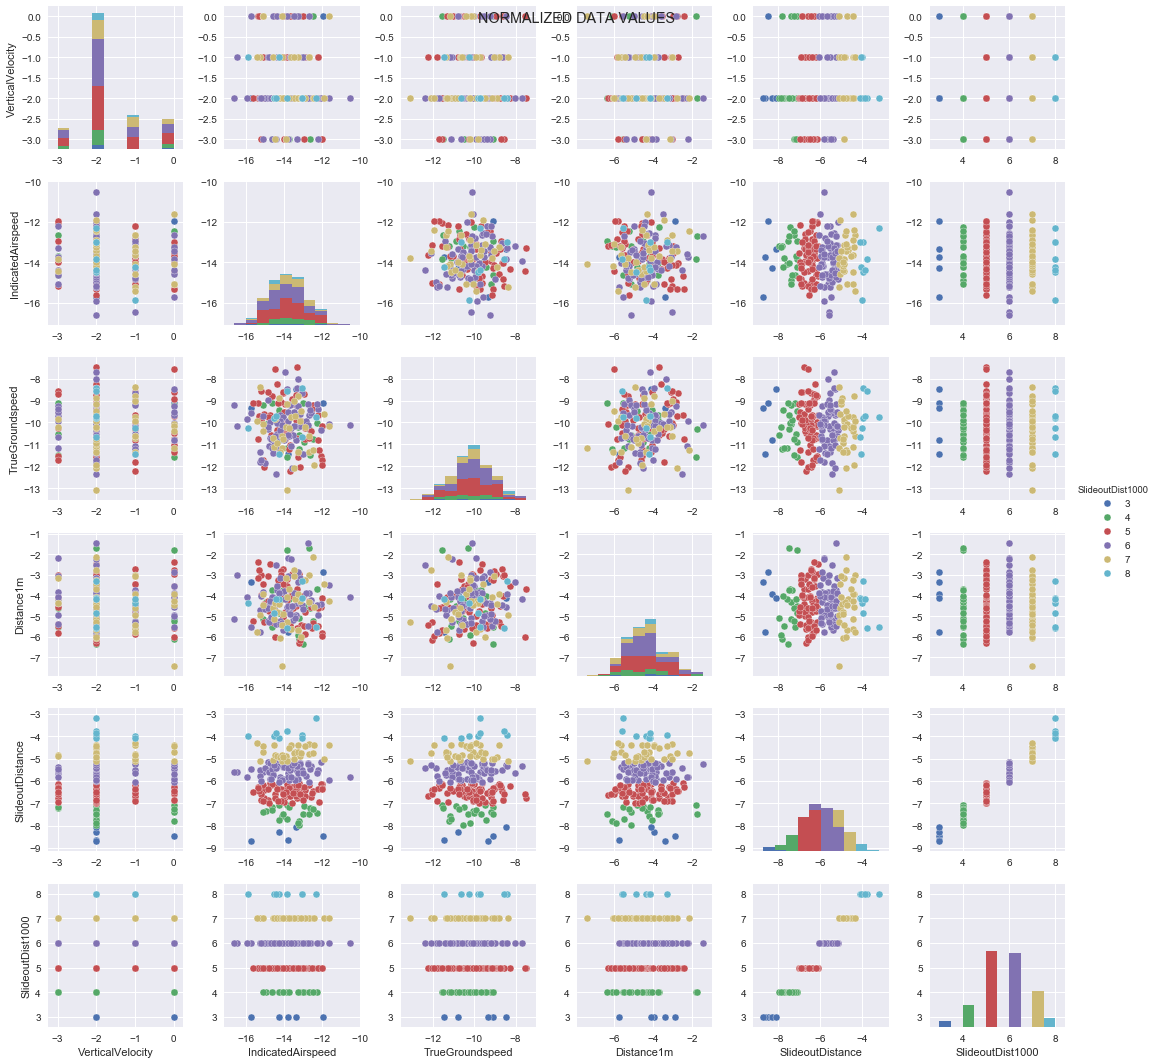

In [234]:
# ref #1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n")
print("Graph of Simulated data for X-15 \nSkid_Distance -v- Vertical velocity, Airspeed, True_Groundspeed and Distance at 1 mile")

df = pd.read_csv(filnam_normdata)
# use  SlideoutDist1000 to 'layer' the data into  layers of multiples of 1000 feet distances
sns.pairplot(df, hue='SlideoutDist1000')
plt.suptitle("NORMALIZED DATA VALUES")       # ref #9
plt.savefig(graphic_normdata)                #  ref #10  Saving graphics to disk
plt.show()

In [236]:
### To create the prediction process
import sklearn.neighbors as nei
import pandas as pd
import sklearn.model_selection as mod
# Load the seaborn package.
import seaborn as sns

# Load the iris data set from a URL.
df = pd.read_csv(filnam_realdata)


In [237]:
inputs = df[['VerticalVelocity','IndicatedAirspeed','TrueGroundspeed','Distance1m']]
outputs = df['SlideoutDist1000']

In [238]:

knn = nei.KNeighborsClassifier(n_neighbors=5)

knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [244]:
knn.predict([[4,176.056,188.261,5295.244]])

array([5], dtype=int64)

In [245]:
(knn.predict(inputs) == outputs).sum()

93

In [246]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [247]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [248]:
(knn.predict(inputs_test) == outputs_test).sum()

26

References: 
#1, https://www.tutorialspoint.com/python/python_poisson_distribution.htm visited: 20181212

#2, https://stackoverflow.com/questions/24452594/fitting-a-poisson-distribution-to-data-in-statsmodels visited: 20181212

#3, https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html visited: 20181212

#4, https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal visited: 20181212

#5, https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file  visited: 2081213

#6, https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python  visisted: 2081213

#7, https://stackoverflow.com/questions/16579407/are-there-any-example-data-sets-for-python  visisted: 20181213

#8, https://seaborn.pydata.org/introduction.html  visited: 20181213

#9, https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot  visited: 20181213

#10, https://stackoverflow.com/questions/32244753/how-to-save-a-seaborn-plot-into-a-file/39482402#39482402 visted: 20181213

#11, https://stackoverflow.com/questions/850795/different-ways-of-clearing-lists  visited: 20181213
